In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install geopy
!pip install seaborn

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ------------------------------ 30.7/125.4 kB 1.4 MB/s eta 0:00:01
   ----------------------------- ---------- 92.2/125.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB ? eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.5 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00


In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.2/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.3/99.8 MB 2.1 MB/s eta 0:00:48
   ---------------------------------------- 0.5/99.8 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.7/99.8 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 1.0/99.8 MB 3.6 MB/s eta 0:00:28
    --------------------------------------- 1.4/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.8/99.8 MB 4.5 MB/s eta 0:00:22
    --------------------------------------- 2.1/99.8 MB 4.9 MB/s eta 0:00:21
   - -------------------------------------- 2.6/99.8 MB 5.3 MB/s eta 0:00:19
   - -------------------------------------- 2.9/99.8 MB 5.4 MB/s eta 0:00:18
   - -

In [6]:
df_train = pd.read_csv('foodtr.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [8]:
df_train.describe(exclude=np.number).T


,count,unique,top,freq
ID,45593,45593,0x4607,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


In [9]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [10]:
#Extract relevant values from column
def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()


,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [11]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID','Delivery_person_Age'],axis=1,inplace=True)
    
print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  18


In [12]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [13]:
#Update datatypes
def update_datatype(df):
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format="%d-%m-%Y")
    
update_datatype(df_train)

In [14]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df_train)

In [15]:
#Check null values
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Time_Orderd                    1731
City                           1200
multiple_deliveries             993
Weather_conditions              616
Road_traffic_density            601
Festival                        228
Order_Date                        0
Time_Order_picked                 0
Delivery_location_longitude       0
Restaurant_latitude               0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
Delivery_location_latitude        0
Restaurant_longitude              0
Time_taken(min)                   0
City_code                         0
dtype: int64

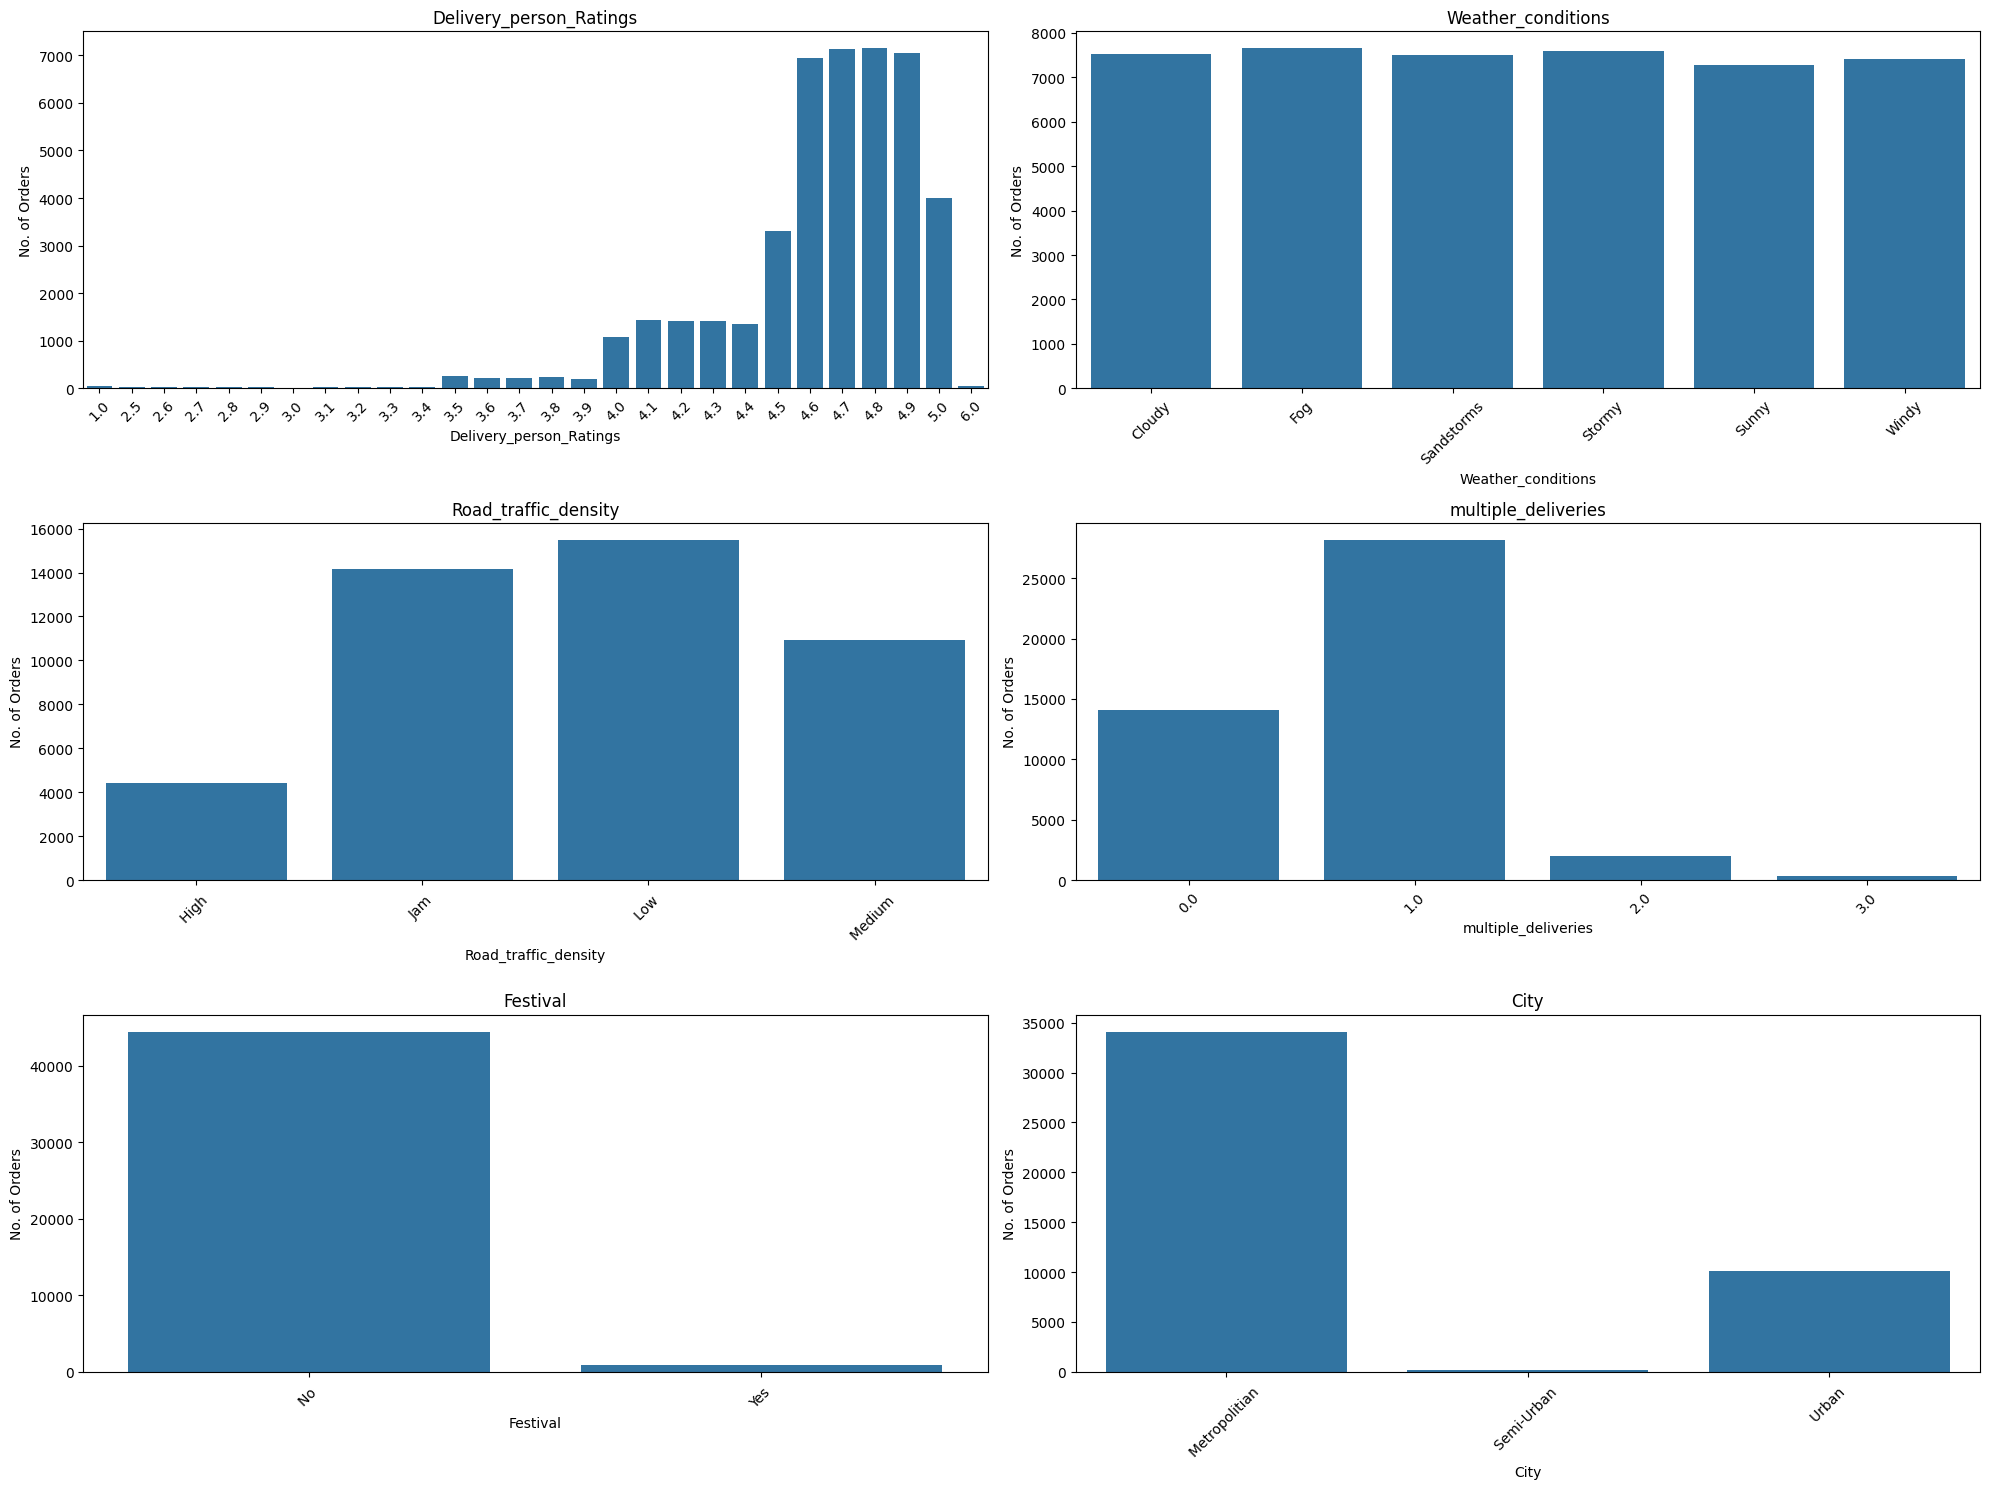

In [16]:
#Let's explore columns that have null values
cols = ['Delivery_person_Ratings','Weather_conditions','Road_traffic_density','multiple_deliveries','Festival','City']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [17]:
#Handle null values
def handle_null_values(df):
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(df_train)
df_train.isnull().sum()

Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
City_code                      0
dtype: int64

In [18]:
def extract_date_features(data):
    data["day"] = data.Order_Date.dt.day
    data["month"] = data.Order_Date.dt.month
    data["quarter"] = data.Order_Date.dt.quarter
    data["year"] = data.Order_Date.dt.year
    data['day_of_week'] = data.Order_Date.dt.day_of_week.astype(int)
    data["is_month_start"] = data.Order_Date.dt.is_month_start.astype(int)
    data["is_month_end"] = data.Order_Date.dt.is_month_end.astype(int)
    data["is_quarter_start"] = data.Order_Date.dt.is_quarter_start.astype(int)
    data["is_quarter_end"] = data.Order_Date.dt.is_quarter_end.astype(int)
    data["is_year_start"] = data.Order_Date.dt.is_year_start.astype(int)
    data["is_year_end"] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df_train)
df_train.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,...,1,2022,5,0,0,0,0,0,0,1
1,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,...,1,2022,4,0,0,0,0,0,0,0
2,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,...,1,2022,5,0,0,0,0,0,0,1
3,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,...,2,2022,1,0,0,0,0,0,0,0
4,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,...,1,2022,5,0,0,0,0,0,0,1


In [19]:

def calculate_time_diff(df):
    # Convert time columns to timedelta
    df['Time_Orderd'] = pd.to_timedelta(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_timedelta(df['Time_Order_picked'])
    
    # Combine Order_Date and Time columns to create datetime columns
    df['Time_Ordered_formatted'] = df['Order_Date'] + df['Time_Orderd']
    df['Time_Order_picked_formatted'] = df['Order_Date'] + df['Time_Order_picked']
    
    # Handle cases where order picked time is past midnight
    df.loc[df['Time_Order_picked'] < df['Time_Orderd'], 'Time_Order_picked_formatted'] += pd.DateOffset(days=1)
    
    # Calculate the order preparation time in minutes
    df['order_prepare_time'] = (df['Time_Order_picked_formatted'] - df['Time_Ordered_formatted']).dt.total_seconds() / 60
    
    # Handle null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(), inplace=True)
    
    # Drop all the time and date related columns
    df.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)

# Apply the function to the dataset
calculate_time_diff(df_train)
print(df_train.head())


   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      4.9            22.745049             75.892471   
1                      4.5            12.913041             77.683237   
2                      4.4            12.914264             77.678400   
3                      4.7            11.003669             76.976494   
4                      4.6            12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude Weather_conditions  \
0                   22.765049                    75.912471              Sunny   
1                   13.043041                    77.813237             Stormy   
2                   12.924264                    77.688400         Sandstorms   
3                   11.053669                    77.026494              Sunny   
4                   13.012793                    80.289982             Cloudy   

  Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  .

In [20]:
#Calculate distance between restaurant location & delivery location
def calculate_distance(df):
    df['distance']=np.zeros(len(df))
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    df['distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_coordinates, delivery_location_coordinates)])
    df['distance']= df['distance'].astype("str").str.extract('(\d+)').astype("int64")
    
calculate_distance(df_train)
df_train.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,...,5,0,0,0,0,0,0,1,15.0,3
1,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,...,4,0,0,0,0,0,0,0,5.0,20
2,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,...,5,0,0,0,0,0,0,1,15.0,1
3,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,...,1,0,0,0,0,0,0,0,10.0,7
4,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,...,5,0,0,0,0,0,0,1,15.0,6


In [21]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df_train)
df_train.head()

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,2,...,5,0,0,0,0,0,0,1,15.0,3
1,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,3,...,4,0,0,0,0,0,0,0,5.0,20
2,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,2,...,5,0,0,0,0,0,0,1,15.0,1
3,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,2,...,1,0,0,0,0,0,0,0,10.0,7
4,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,3,...,5,0,0,0,0,0,0,1,15.0,6


In [22]:
df_train.info('columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Ratings      45593 non-null  float64
 1   Restaurant_latitude          45593 non-null  float64
 2   Restaurant_longitude         45593 non-null  float64
 3   Delivery_location_latitude   45593 non-null  float64
 4   Delivery_location_longitude  45593 non-null  float64
 5   Weather_conditions           45593 non-null  int32  
 6   Road_traffic_density         45593 non-null  int32  
 7   Vehicle_condition            45593 non-null  int64  
 8   Type_of_order                45593 non-null  int32  
 9   Type_of_vehicle              45593 non-null  int32  
 10  multiple_deliveries          45593 non-null  float64
 11  Festival                     45593 non-null  int32  
 12  City                         45593 non-null  int32  
 13  Time_taken(min) 

In [23]:
#Split features & label
X = df_train.drop('Time_taken(min)',axis='columns')  # Features
y = df_train['Time_taken(min)']  # Target variable


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 28)
(36474,)
(9119, 28)
(9119,)


In [24]:
print(y[0])

24


In [25]:
print(df_train.head())

   Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  \
0                      4.9            22.745049             75.892471   
1                      4.5            12.913041             77.683237   
2                      4.4            12.914264             77.678400   
3                      4.7            11.003669             76.976494   
4                      4.6            12.972793             80.249982   

   Delivery_location_latitude  Delivery_location_longitude  \
0                   22.765049                    75.912471   
1                   13.043041                    77.813237   
2                   12.924264                    77.688400   
3                   11.053669                    77.026494   
4                   13.012793                    80.289982   

   Weather_conditions  Road_traffic_density  Vehicle_condition  Type_of_order  \
0                   4                     0                  2              3   
1                   3     

In [26]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

In [27]:
from sklearn import tree

In [28]:
model=tree.DecisionTreeRegressor()

In [29]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
y_prediction=model.predict(X_test)
y_prediction

array([43., 47., 33., ..., 25., 10., 33.])

In [31]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 5.31
Mean Squared Error (MSE): 48.61
Root Mean Squared Error (RMSE): 6.97
R-squared (R2) Score: 0.45


In [32]:
model.score(X_train,y_train)*100

99.99993779343933

In [33]:
model.score(X_test,y_test)*100

44.56328607001851

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
modelr=RandomForestRegressor(n_estimators=20)

In [36]:
modelr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

In [37]:
modelr.score(X_train,y_train)*100

95.22158950657843

In [38]:
modelr.score(X_test,y_test)*100

69.17911348947011

In [39]:
from sklearn.neighbors import KNeighborsRegressor

# Example usage
modelk = KNeighborsRegressor(n_neighbors=3)


In [40]:
modelk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:
modelk.score(X_train,y_train)

  File "c:\Users\viswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.6897511375714545

In [42]:
model.predict([[4.9,22.745049,75.892471,22.765049,75.912471,1,2,1,1,1,1,23]])

ValueError: X has 12 features, but DecisionTreeRegressor is expecting 28 features as input.

In [44]:
import joblib

# Save the model to a file
joblib.dump(model, 'model1.pkl')


['model1.pkl']